In [94]:
import pandas as pd
import os, io
import numpy as np
from pandas import Series, DataFrame, read_table
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [161]:
user_train = pd.read_csv('/Users/utkarshbharadwaj/Downloads/mckinesy_recommendation_dataset/train.csv')
user_train.head(20)


,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933
5,4576_6,4576,6,CI25135
6,4576_7,4576,7,CI23975
7,4576_8,4576,8,CI25126
8,4576_9,4576,9,CI24915
9,4576_10,4576,10,CI24957


In [96]:
user_train.rename(columns={'challenge': 'challenge_ID'}, inplace=True)

In [97]:
user_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903916 entries, 0 to 903915
Data columns (total 4 columns):
user_sequence         903916 non-null object
user_id               903916 non-null int64
challenge_sequence    903916 non-null int64
challenge_ID          903916 non-null object
dtypes: int64(2), object(2)
memory usage: 27.6+ MB


In [98]:
# user_train['uid'] = user_train.user_sequence.str.split('_').str.get(0)
# user_train['cid'] = user_train.user_sequence.str.split('_').str.get(1)
# user_train.head(13)
# plt.bar(user_train['challenge_ID'],user_train['challenge_ID'].sum() ,align='center', alpha=0.5)

In [160]:
user_train.isnull().sum()
# user_train['cid'] = user_train['cid'].astype(int)
user_train = user_train[user_train.challenge_sequence <= 10]                          
user_train.head(13)

,user_sequence,user_id,challenge_sequence,challenge_ID
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933
5,4576_6,4576,6,CI25135
6,4576_7,4576,7,CI23975
7,4576_8,4576,8,CI25126
8,4576_9,4576,9,CI24915
9,4576_10,4576,10,CI24957


In [100]:
challenge_data_train = pd.read_csv('/Users/utkarshbharadwaj/Downloads/mckinesy_recommendation_dataset/challenge_data.csv')
challenge_data_train.total_submissions.value_counts()

#challenge_data_train.where(['total_submissions'] < 50)



65.0      41
82.0      35
92.0      33
68.0      33
57.0      33
53.0      32
70.0      31
58.0      31
89.0      31
61.0      31
73.0      30
54.0      30
42.0      30
37.0      29
47.0      29
67.0      29
55.0      29
31.0      28
114.0     28
38.0      27
39.0      27
79.0      27
43.0      27
33.0      27
81.0      27
26.0      27
78.0      27
41.0      27
35.0      27
130.0     26
          ..
2422.0     1
1223.0     1
881.0      1
1206.0     1
1021.0     1
999.0      1
5446.0     1
1559.0     1
2036.0     1
2384.0     1
1248.0     1
816.0      1
3670.0     1
1338.0     1
719.0      1
613.0      1
1197.0     1
857.0      1
4566.0     1
368.0      1
496.0      1
1472.0     1
8897.0     1
928.0      1
544.0      1
624.0      1
800.0      1
392.0      1
452.0      1
1915.0     1
Name: total_submissions, Length: 1067, dtype: int64

In [101]:
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5594 non-null object
total_submissions       5254 non-null float64
publish_date            5606 non-null object
author_ID               5567 non-null object
author_gender           5509 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [102]:
final_train = user_train.join(challenge_data_train.set_index('challenge_ID'), on='challenge_ID')
final_train.head(13)

,user_sequence,user_id,challenge_sequence,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,4576_1,4576,1,CI23714,1,SI2477,14723.0,12-06-2006,AI563766,M,AOI100129,29.0
1,4576_2,4576,2,CI23855,1,SI2468,20993.0,24-07-2006,AI563823,M,NaN,29.0
2,4576_3,4576,3,CI24917,1,SI2545,43409.0,02-07-2007,AI564588,F,AOI100581,66.0
3,4576_4,4576,4,CI23663,1,SI2472,8897.0,15-09-2004,AI563724,M,AOI100098,45.0
4,4576_5,4576,5,CI23933,1,SI2468,15086.0,27-07-2006,AI563783,M,AOI100149,31.0
5,4576_6,4576,6,CI25135,1,SI2556,5446.0,25-08-2007,AI563754,M,AOI100129,61.0
6,4576_7,4576,7,CI23975,1,SI2462,9204.0,24-01-2005,AI563823,M,NaN,61.0
7,4576_8,4576,8,CI25126,1,SI2556,4269.0,21-08-2007,AI563872,M,AOI100085,46.0
8,4576_9,4576,9,CI24915,1,SI2545,7389.0,02-07-2007,AI563790,F,AOI100154,29.0
9,4576_10,4576,10,CI24957,1,SI2545,2241.0,06-07-2007,AI563790,F,AOI100154,29.0


In [139]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695320 entries, 0 to 903912
Data columns (total 12 columns):
user_sequence           695320 non-null object
user_id                 695320 non-null int64
challenge_sequence      695320 non-null int64
challenge_ID            695320 non-null object
programming_language    695320 non-null int64
challenge_series_ID     695275 non-null object
total_submissions       693141 non-null float64
publish_date            695320 non-null object
author_ID               692951 non-null object
author_gender           690959 non-null object
author_org_ID           658354 non-null object
category_id             668081 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 69.0+ MB


In [138]:
final_train.describe()

,user_id,challenge_sequence,programming_language,total_submissions,category_id
count,695320.000000,695320.000000,695320.000000,693141.000000,668081.000000
mean,59286.391043,5.500000,1.010013,2850.703238,61.577714
std,31538.569476,2.872283,0.129097,5621.618015,34.490168
min,4576.000000,1.000000,1.000000,4.000000,22.000000
25%,31940.750000,3.000000,1.000000,349.000000,35.000000
50%,59221.000000,5.500000,1.000000,1036.000000,57.000000
75%,86616.250000,8.000000,1.000000,2889.000000,70.000000
max,113839.000000,10.000000,3.000000,43409.000000,274.000000


In [105]:
challenge_data_train = pd.read_csv('/Users/utkarshbharadwaj/Downloads/mckinesy_recommendation_dataset/challenge_data.csv')
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5594 non-null object
total_submissions       5254 non-null float64
publish_date            5606 non-null object
author_ID               5567 non-null object
author_gender           5509 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [106]:
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5594 non-null object
total_submissions       5254 non-null float64
publish_date            5606 non-null object
author_ID               5567 non-null object
author_gender           5509 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [162]:
challenge_data_train.head()

,challenge_ID,programming_language,challenge_series_ID,total_submissions,author_ID,author_gender,author_org_ID,category_id
0,0,2,10,37.0,0,1,0,29.0
1,1,2,0,48.0,1,1,1,32.0
2,2,1,0,15.0,2,1,2,29.0
3,3,1,275,236.0,3,1,3,70.0
4,4,2,5,137.0,4,1,4,29.0


In [107]:
challenge_data_train['challenge_series_ID'].replace(np.nan,challenge_data_train['challenge_series_ID'].mode()[0],inplace=True)

In [108]:
challenge_data_train[['total_submissions']].fillna(0 ,inplace = True)

In [109]:
challenge_data_train.total_submissions.fillna(challenge_data_train.total_submissions.mean(),inplace=True)


In [110]:
# challenge_data_train['total_submissions'].isna().sum()
# coerce_df_columns_to_numeric(challenge_data_train, ['total_submissions'])

# df[column_list] = challenge_data_train[column_list].apply(pd.to_numeric, errors='coerce')

# challenge_data_train.total_submissions.fillna(challenge_data_train.total_submissions.mean())

In [111]:
challenge_data_train['author_ID'].replace(np.nan,challenge_data_train['author_ID'].mode()[0],inplace=True)
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null object
author_ID               5606 non-null object
author_gender           5509 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [112]:
challenge_data_train['author_gender'].replace(np.nan,challenge_data_train['author_gender'].mode()[0],inplace=True)
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null object
author_ID               5606 non-null object
author_gender           5606 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [113]:
challenge_data_train['author_org_ID'].replace(np.nan,challenge_data_train['author_org_ID'].mode()[0],inplace=True)
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null object
author_ID               5606 non-null object
author_gender           5606 non-null object
author_org_ID           5606 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [114]:
challenge_data_train['category_id'].replace(np.nan,challenge_data_train['category_id'].mode()[0],inplace=True)
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null object
author_ID               5606 non-null object
author_gender           5606 non-null object
author_org_ID           5606 non-null object
category_id             5606 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [115]:
challenge_data_train['publish_date'] = pd.to_datetime(challenge_data_train['publish_date'])
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null datetime64[ns]
author_ID               5606 non-null object
author_gender           5606 non-null object
author_org_ID           5606 non-null object
category_id             5606 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 394.2+ KB


In [116]:
from sklearn.preprocessing import LabelEncoder
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [117]:
dummyEncode(challenge_data_train)
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null int64
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null int64
total_submissions       5606 non-null float64
publish_date            5606 non-null datetime64[ns]
author_ID               5606 non-null int64
author_gender           5606 non-null int64
author_org_ID           5606 non-null int64
category_id             5606 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 394.2 KB


In [118]:
challenge_data_train.drop(['publish_date'], axis =1, inplace=True)
challenge_data_train.head()

,challenge_ID,programming_language,challenge_series_ID,total_submissions,author_ID,author_gender,author_org_ID,category_id
0,0,2,10,37.0,0,1,0,29.0
1,1,2,0,48.0,1,1,1,32.0
2,2,1,0,15.0,2,1,2,29.0
3,3,1,275,236.0,3,1,3,70.0
4,4,2,5,137.0,4,1,4,29.0


In [164]:

import pandas as pd, numpy as np
from sklearn.cluster import KMeans
# from sklearn.datasets import load_iris
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(challenge_data_train)
    distortions.append(kmeanModel.inertia_)

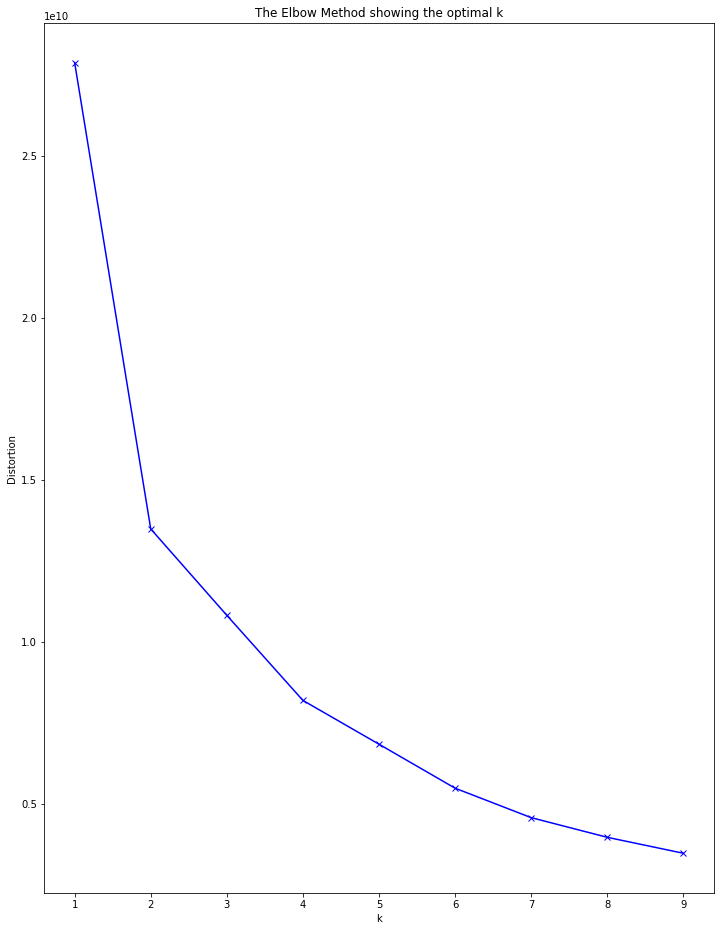

In [165]:
plt.figure(figsize=(12,16))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [141]:
kmeanModel = KMeans(n_clusters = 2)
kmeanModel.fit(challenge_data_train)
distortions.append(kmeanModel.inertia_)

In [142]:
kmeanModel.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [166]:
kmeanModel.cluster_centers_

array([[6.89121581e+02, 1.11550152e+00, 4.83168693e+01, 2.56960486e+02,
        4.04765198e+02, 8.69300912e-01, 1.88000000e+02, 5.43138298e+01],
       [4.50592126e+03, 1.04986877e+00, 3.09493438e+02, 2.37028919e+02,
        5.52307087e+02, 9.23884514e-01, 2.36706037e+02, 4.69081365e+01],
       [3.24969646e+03, 1.06521739e+00, 2.23556361e+02, 2.54700544e+02,
        2.14248551e+03, 8.76006441e-01, 7.20760064e+02, 8.12979066e+01],
       [1.12010000e+03, 1.00000000e+00, 9.32000000e+01, 1.33050000e+04,
        5.10000000e+02, 1.00000000e+00, 2.08800000e+02, 4.59000000e+01],
       [2.05008182e+03, 1.02727273e+00, 1.49354545e+02, 3.67824545e+03,
        1.20112727e+03, 8.90909091e-01, 3.40609091e+02, 5.98272727e+01],
       [4.65686667e+03, 1.05416667e+00, 3.15305556e+02, 2.46972077e+02,
        2.86504306e+03, 9.11111111e-01, 2.22061111e+02, 8.11013889e+01],
       [1.98035309e+03, 1.06844741e+00, 1.46838898e+02, 2.81464483e+02,
        1.17184558e+03, 8.85642738e-01, 4.66145242e+02, 5.

In [167]:
user_train.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933


In [145]:
comp_ratings = user_train.pivot_table(index=['user_id'],columns=['challenge_ID'],values='challenge_sequence')
comp_ratings.head()

challenge_ID,CI23478,CI23479,CI23482,CI23483,CI23484,CI23485,CI23486,CI23488,CI23489,CI23491,...,CI29061,CI29073,CI29074,CI29075,CI29076,CI29079,CI29080,CI29081,CI29082,CI29083
user_id,,,,,,,,,,,,,,,,,,,,,
4576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
challenge_data_train.head()

,challenge_ID,programming_language,challenge_series_ID,total_submissions,author_ID,author_gender,author_org_ID,category_id
0,0,2,10,37.0,0,1,0,29.0
1,1,2,0,48.0,1,1,1,32.0
2,2,1,0,15.0,2,1,2,29.0
3,3,1,275,236.0,3,1,3,70.0
4,4,2,5,137.0,4,1,4,29.0


In [127]:
#challenge_data_train = challenge_data_train[challenge_data_train.total_submissions > 50]

In [128]:
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 8 columns):
challenge_ID            5606 non-null int64
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null int64
total_submissions       5606 non-null float64
author_ID               5606 non-null int64
author_gender           5606 non-null int64
author_org_ID           5606 non-null int64
category_id             5606 non-null float64
dtypes: float64(2), int64(6)
memory usage: 350.5 KB


In [146]:
challenge_data_train.head()

,challenge_ID,programming_language,challenge_series_ID,total_submissions,author_ID,author_gender,author_org_ID,category_id
0,0,2,10,37.0,0,1,0,29.0
1,1,2,0,48.0,1,1,1,32.0
2,2,1,0,15.0,2,1,2,29.0
3,3,1,275,236.0,3,1,3,70.0
4,4,2,5,137.0,4,1,4,29.0


In [158]:
final_train.head(13)

,user_sequence,user_id,challenge_sequence,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,4576_1,4576,1,CI23714,1,SI2477,14723.0,12-06-2006,AI563766,M,AOI100129,29.0
1,4576_2,4576,2,CI23855,1,SI2468,20993.0,24-07-2006,AI563823,M,NaN,29.0
2,4576_3,4576,3,CI24917,1,SI2545,43409.0,02-07-2007,AI564588,F,AOI100581,66.0
3,4576_4,4576,4,CI23663,1,SI2472,8897.0,15-09-2004,AI563724,M,AOI100098,45.0
4,4576_5,4576,5,CI23933,1,SI2468,15086.0,27-07-2006,AI563783,M,AOI100149,31.0
5,4576_6,4576,6,CI25135,1,SI2556,5446.0,25-08-2007,AI563754,M,AOI100129,61.0
6,4576_7,4576,7,CI23975,1,SI2462,9204.0,24-01-2005,AI563823,M,NaN,61.0
7,4576_8,4576,8,CI25126,1,SI2556,4269.0,21-08-2007,AI563872,M,AOI100085,46.0
8,4576_9,4576,9,CI24915,1,SI2545,7389.0,02-07-2007,AI563790,F,AOI100154,29.0
9,4576_10,4576,10,CI24957,1,SI2545,2241.0,06-07-2007,AI563790,F,AOI100154,29.0


In [159]:
# Fill missing values with 0's
final_train.fillna(0, inplace=True)

# Normalize the data by converting into numpy array first
matrix = final_train.as_matrix()
user_mean = np.mean(matrix, axis=1)
matrix_normed = matrix - user_mean.reshape(-1,1)

TypeError: must be str, not float

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer

In [157]:
train = pd.read_csv('/Users/utkarshbharadwaj/Downloads/mckinesy_recommendation_dataset/train.csv')
X = train.iloc[:,0:3]
y = train.iloc[:,3]
y

0         CI23714
1         CI23855
2         CI24917
3         CI23663
4         CI23933
5         CI25135
6         CI23975
7         CI25126
8         CI24915
9         CI24957
10        CI24958
11        CI23667
12        CI23691
13        CI23663
14        CI23855
15        CI23933
16        CI23975
17        CI24530
18        CI23714
19        CI23648
20        CI23781
21        CI23667
22        CI25135
23        CI24915
24        CI25727
25        CI26051
26        CI26155
27        CI26156
28        CI26157
29        CI26158
           ...   
903886    CI23691
903887    CI23836
903888    CI23510
903889    CI26621
903890    CI23880
903891    CI23933
903892    CI26052
903893    CI24866
903894    CI25049
903895    CI25677
903896    CI25672
903897    CI24876
903898    CI24139
903899    CI23992
903900    CI24892
903901    CI23990
903902    CI25674
903903    CI24915
903904    CI24931
903905    CI24954
903906    CI24968
903907    CI24957
903908    CI25727
903909    CI23740
903910    